In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read The CSV
prima_data = pd.read_csv('data/pima-indians-diabetes.csv',
                         names=['Times pregnant',
                                'Plasma glucose concentration',
                                'Diastolic blood pressure',
                                'Triceps skinfold thickness',
                                '2-Hour serum insulin',
                                'BMI',
                                'Diabetes pedigree function',
                                'Age',
                                'Class'])


prima_data.head()

,Times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skinfold thickness,2-Hour serum insulin,BMI,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Info
prima_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Times pregnant                768 non-null    int64  
 1   Plasma glucose concentration  768 non-null    int64  
 2   Diastolic blood pressure      768 non-null    int64  
 3   Triceps skinfold thickness    768 non-null    int64  
 4   2-Hour serum insulin          768 non-null    int64  
 5   BMI                           768 non-null    float64
 6   Diabetes pedigree function    768 non-null    float64
 7   Age                           768 non-null    int64  
 8   Class                         768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Describe
prima_data.describe()

,Times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skinfold thickness,2-Hour serum insulin,BMI,Diabetes pedigree function,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Visualizations

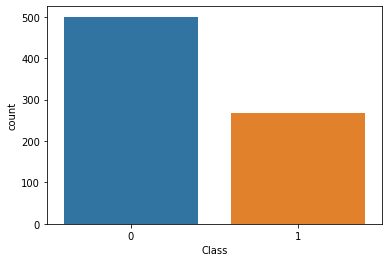

In [6]:
# Let's visualize the class
sns.countplot(x='Class', data=prima_data)

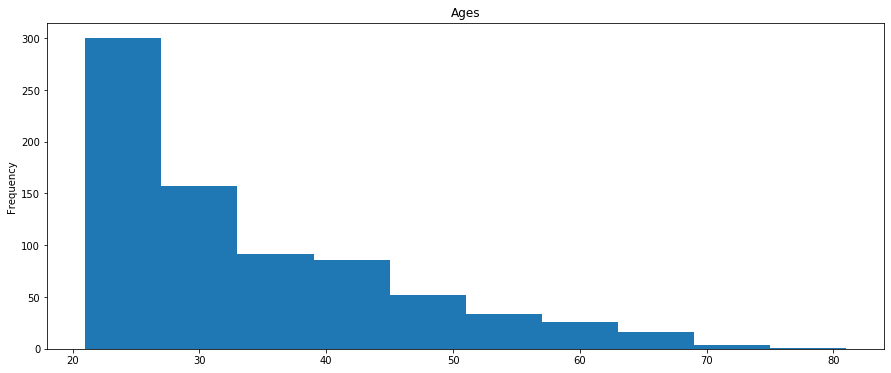

In [7]:
# Let's visualize the ages
prima_data['Age'].plot.hist(title='Ages', figsize=(15, 6))

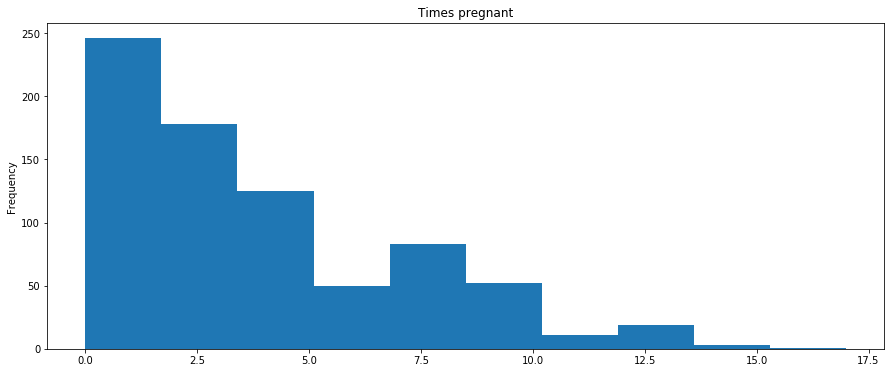

In [8]:
# Let's visualize the times pragnent
prima_data['Times pregnant'].plot.hist(title='Times pregnant', figsize=(15, 6))

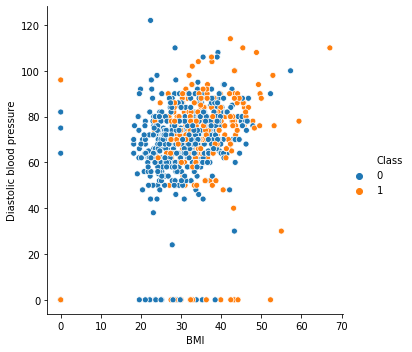

In [9]:
# Let's visualize BMI vs Blood Presure
sns.relplot(y='Diastolic blood pressure', x='BMI', hue='Class', data=prima_data)

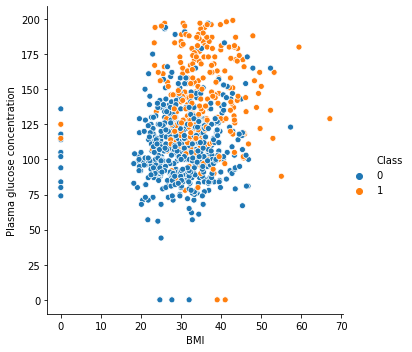

In [10]:
# Let's visualize BMI vs Plasma Glucose
sns.relplot(y='Plasma glucose concentration', x='BMI', hue='Class', data=prima_data)

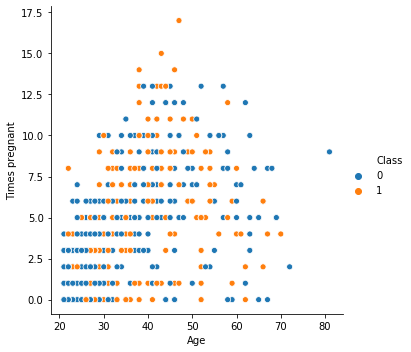

In [11]:
# Let's visualize Age vs Time Pragnent
sns.relplot(y='Times pregnant', x='Age', hue='Class', data=prima_data)

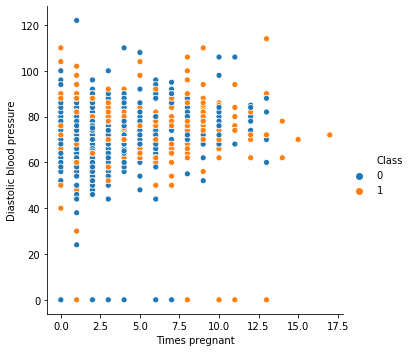

In [12]:
# Let's visualize Time Pragnent vs Blood Presure
sns.relplot(y='Diastolic blood pressure', x='Times pregnant', hue='Class', data=prima_data)

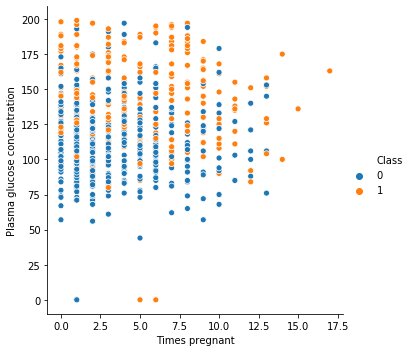

In [13]:
# Let's visualize Time Pragnent vs Plasma glucose concentration
sns.relplot(y='Plasma glucose concentration', x='Times pregnant', hue='Class', data=prima_data)

## Data Preprocessing

In [40]:
# Check for null OR NAN
prima_data.isnull().sum()

Times pregnant                  0
Plasma glucose concentration    0
Diastolic blood pressure        0
Triceps skinfold thickness      0
2-Hour serum insulin            0
BMI                             0
Diabetes pedigree function      0
Age                             0
Class                           0
dtype: int64

In [29]:
# Split the data into samples and labels
X = prima_data.iloc[:, :-1].to_numpy()
y = prima_data['Class'].to_numpy()

In [30]:
from sklearn.model_selection import train_test_split

In [69]:
# Let's split the data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)

# Shapes
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((691, 8), (691,)), ((77, 8), (77,)))

In [70]:
from sklearn.preprocessing import MinMaxScaler

In [71]:
scaler = MinMaxScaler(feature_range=(0, 1))

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [98]:
# Reshaping

X_train = X_train.reshape(X_train.shape[0], 4, -1)
X_test = X_test.reshape(X_test.shape[0], 4, -1)

X_train.shape, y_train.shape

((691, 4, 2), (691,))

## Build The Model

In [73]:
import tensorflow as tf
from tensorflow.keras import Sequential, models
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [94]:
# Define the network
model = Sequential()

# Add the first layer
model.add(Dense(50, input_shape=(X_train.shape[1], 2), activation='relu'))

# Add the second layer
model.add(Dense(50, activation='relu'))

# Add the output layer
model.add(Dense(1, activation='relu'))

In [95]:
# Summary
model.summary(0)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 4, 50)             150       
_________________________________________________________________
dense_19 (Dense)             (None, 4, 50)             2550      
_________________________________________________________________
dense_20 (Dense)             (None, 4, 1)              51        
Total params: 2,751
Trainable params: 2,751
Non-trainable params: 0
_________________________________________________________________


In [96]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [97]:
# Train the model
# history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.1, verbose=2)

Train on 621 samples, validate on 70 samples
Epoch 1/10


InvalidArgumentError: Incompatible shapes: [32,1] vs. [32,4,1]
	 [[{{node metrics_12/acc/Equal}}]]